In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("C:\Data Science\data\processed\Youtube\consolidated.csv")

In [3]:
df.head()

,Unnamed: 0,NewID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Search Term,...,Date Uploaded,Views,Likes_x,Subscriber Count,Country,Comment,Likes_y,AuthorChannelId,PublishedAt,VideoID
0,0,1,0.0,0.543,0.457,0.9098,0.000999,0.014936,0.984065,3090,...,2022-01-06T15:03:27Z,453321,19909.0,390000.0,Unknown,"Thank You for watching this Video, If you enjo...",466.0,UCOOMgoGO9PwAb65v6Zyj43w,2022-01-06T15:05:58Z,NaN
1,1,2,0.0,1.000,0.000,0.0000,0.198987,0.771348,0.029665,3090,...,2022-01-06T15:03:27Z,453321,19909.0,390000.0,Unknown,"Literally, You would need to mount a f nuclear...",2023.0,UCvOuwNiwb_ZpY7okvtIl4NQ,2022-01-06T15:21:04Z,NaN
2,2,3,0.0,1.000,0.000,0.0000,0.056606,0.749840,0.193554,3090,...,2022-01-06T15:03:27Z,453321,19909.0,390000.0,Unknown,At this point it would make more sense to just...,1502.0,UCGQHDdyBVyvsAEsSiFqzApQ,2022-01-06T15:59:16Z,NaN
3,3,4,0.0,0.877,0.123,0.3680,0.037017,0.900374,0.062609,3090,...,2022-01-06T15:03:27Z,453321,19909.0,390000.0,Unknown,Just an FYI: 1500 watts is the max continuous ...,512.0,UChnIXMfkyPFC5uGI_9AYrqw,2022-01-06T15:16:11Z,NaN
4,4,5,0.0,0.828,0.172,0.3612,0.779735,0.203648,0.016617,3090,...,2022-01-06T15:03:27Z,453321,19909.0,390000.0,Unknown,My 550W power supply be like: *”Why am I still...,375.0,UCgzqME6r2_RzA2zemLzYg3A,2022-01-06T15:09:09Z,NaN


In [ ]:
search_terms = ['3090', '4090', 'AGI', 'Open AI', 'xAI Grok', 'Copilot', 'Sora',
               'Andrew Tate', 'Ben Shapiro', 'Candace Owens', 'Jordan Peterson', 
               'Antisemitism', 'Islamophobia', 'Extremism', 'Apple', 'Samsung', 
               'Pixel 8', 'iphone', 'Samsung S24', 'AMD', 'Nvidia', 'Intel', 
               'Microsoft', 'Christianity', 'islam', 'Judaism', 'Justin Trudeau', 
               'Kier Starmer', 'Biden', 'Michael Gove', 'Rishi Sunak', 'Sadiq Khan', 
               'Netanyahu', 'Putin', 'Labour', 'Tories', 'Israel', 'Gaza', 'Arsenal', 
               'Liverpool FC', 'FC Porto', 'Manchester United', 'Max Verstapen', 
               'Charles Leclerc', 'Lewis Hamilton', 'Bitcoin', 'Crypto', 'Ford', 
               'Tesla', 'Mercedes', 'China', 'Data Science', 'Mike Tyson']

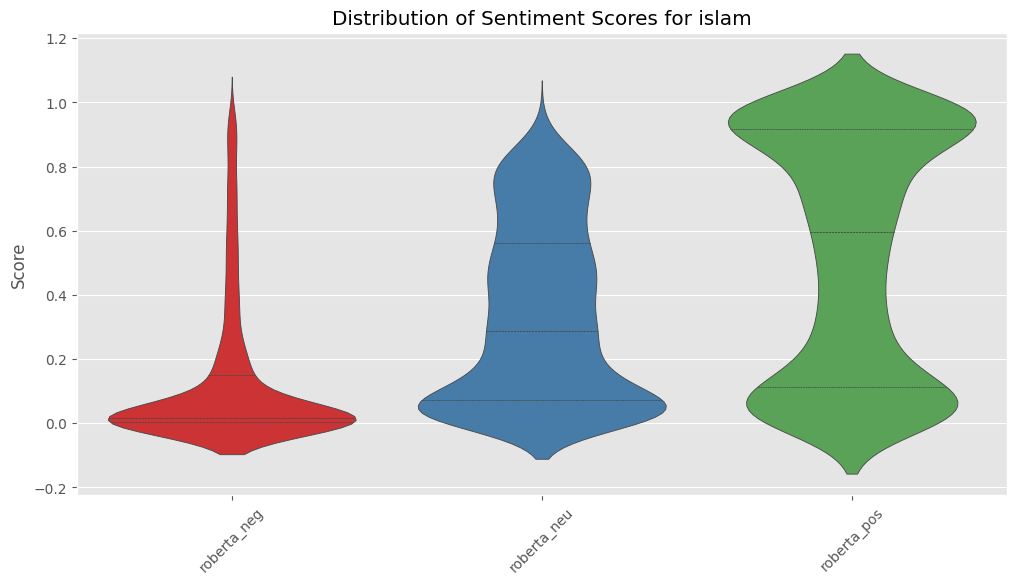

In [4]:

import plotly.express as px
search_term = 'islam'
df = pd.read_csv("C:\Data Science\data\processed\Youtube\consolidated.csv")
filtered_df = df[df['Search Term'] == search_term]


# Plot the violin plots for sentiment scores of the filtered DataFrame
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df[['roberta_neg', 'roberta_neu', 'roberta_pos']],
                palette='Set1', inner='quartile')

plt.title(f'Distribution of Sentiment Scores for {search_term}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [16]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2346 entries, 0 to 2345
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2346 non-null   int64  
 1   NewID             2346 non-null   int64  
 2   vader_neg         2346 non-null   float64
 3   vader_neu         2346 non-null   float64
 4   vader_pos         2346 non-null   float64
 5   vader_compound    2346 non-null   float64
 6   roberta_neg       2346 non-null   float64
 7   roberta_neu       2346 non-null   float64
 8   roberta_pos       2346 non-null   float64
 9   Search Term       2346 non-null   object 
 10  ID                2346 non-null   object 
 11  Title             2346 non-null   object 
 12  Author            2346 non-null   object 
 13  Date Uploaded     2346 non-null   object 
 14  Views             2346 non-null   int64  
 15  Likes_x           2346 non-null   float64
 16  Subscriber Count  2346 non-null   float64
 17  

In [6]:
import plotly.express as px
import pandas as pd

search_term = 'Extremism'
df_filtered = df[df['Search Term'] == search_term]
max_likes = df_filtered['Likes_y'].max()
# Create the scatter plot with a larger figure size
fig = px.scatter(df_filtered, x='ID', y='Likes_y',
                 hover_data=['Comment'],  # Shows the comment text on hover
                 color='Title',  # Color-code by title
                 title=f'Likes per Comment for {search_term}')

# Improve layout with a larger figure size
fig.update_layout(
    xaxis_title="Comment Identifier",
    yaxis_title="Likes per Comment",
    hovermode="closest",
    yaxis=dict(range=[0, max_likes + (0.1 * max_likes)]),
    showlegend=True,  # Hide legend if it's not necessary
    height=1000,  # You can adjust the height
    width=1000  # You can adjust the width
)

# Potentially hide overlapping x-axis labels
fig.update_xaxes(tickmode='array',
                 tickvals=[],
                 ticktext=[])

# Show the plot
fig.show()


In [46]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      int64  
 1   NewID             0 non-null      int64  
 2   vader_neg         0 non-null      float64
 3   vader_neu         0 non-null      float64
 4   vader_pos         0 non-null      float64
 5   vader_compound    0 non-null      float64
 6   roberta_neg       0 non-null      float64
 7   roberta_neu       0 non-null      float64
 8   roberta_pos       0 non-null      float64
 9   Search Term       0 non-null      object 
 10  ID                0 non-null      object 
 11  Title             0 non-null      object 
 12  Author            0 non-null      object 
 13  Date Uploaded     0 non-null      object 
 14  Views             0 non-null      int64  
 15  Likes_x           0 non-null      float64
 16  Subscriber Count  0 non-null      float64
 17  Country       

In [11]:
import pandas as pd
import plotly.express as px
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk

# Make sure to download the set of stop words the first time
nltk.download('stopwords')

search_term = 'Jordan Peterson'
df = pd.read_csv("C:\Data Science\data\processed\Youtube\consolidated.csv")
filtered_df = df[df['Search Term'] == search_term]

# Load the list of stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to clean and split comments into words
def clean_and_split(comment, search_term):
    # Remove the search term
    for term in search_term.split():
        comment = re.sub(r'\b' + term + r'\b', '', comment, flags=re.IGNORECASE)
    
    # Remove non-alphabetic characters and split into words
    words = re.sub("[^a-zA-Z]", " ", comment).lower().split()
    
    # Remove stopwords and words that are 2 characters or less
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return words

# Clean comments, split into words, flatten the list of lists, and count occurrences
all_words = filtered_df['Comment'].dropna().astype(str).apply(lambda x: clean_and_split(x, search_term))
flat_list = [word for sublist in all_words for word in sublist]
word_counts = Counter(flat_list)

# Get the most common words and their counts
most_common_words = word_counts.most_common(40)

# Separate the words and counts into two lists for plotting
words, counts = zip(*most_common_words)

# Create a bar plot with Plotly
fig = px.bar(y=words, x=counts, orientation='h', title=f"Top 45 Most Common Words in {search_term} Comments",
              labels={'x':'Frequency', 'y':'Words'},
              color=counts,  # Assigns a color based on the counts
             color_continuous_scale='plotly3')  # Uses the Viridis color scale)
fig.update_layout(
    xaxis_tickangle=-45,
    width=600,  # Adjust width as needed
    height=1000,  # Adjust height as needed, especially for a large number of words
    title=f'Top 45 Most Common Words in {search_term} Comments',
    xaxis_title='Frequency',
    yaxis_title='Words'
)

# Show the plot
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
